In [1]:
from os.path import join

import matplotlib.pyplot as plt
%matplotlib inline

import gensim
import numpy as np
import scipy as sp

from sklearn.datasets import fetch_20newsgroups


%run ../src/load_data_utils.py
%run ../src/glove_2_word2vec.py

In [2]:
__, DATA_DIR = get_env_vars()
VECTORS_DIR = join(DATA_DIR, 'glove.6B')
VECTORS_FILENAME = 'glove.6B.100d.txt'
VECTORS_FILENAME_DIR = join(VECTORS_DIR, 'glove.6B.100d.txt')

newsgroups_train = fetch_20newsgroups()
newsgroups_test = fetch_20newsgroups(subset='test')

model = gensim.models.KeyedVectors.load(str(join(VECTORS_DIR, 'word2vec.6B.100d')))

## Checking words similarity

$king + woman - man \approx queen$ example

In [3]:
model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755735874176025),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534753799438),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.6311717629432678),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

## Bag of Words encoding

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2)
X_train_text = newsgroups_train['data']
X_test_text = newsgroups_test['data']

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)



In [5]:
y_train = newsgroups_train['target']
y_test = newsgroups_test['target']

In [6]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_iter=50)
%time X_reduced = tsvd.fit_transform(X_train)

CPU times: user 23.4 s, sys: 39.7 s, total: 1min 3s
Wall time: 19.7 s


## Truncated SVD plot

Truncated SVD of rank $k$ is algorithm that computes $k$ principal components of a matrix, like PCA but iteratively.

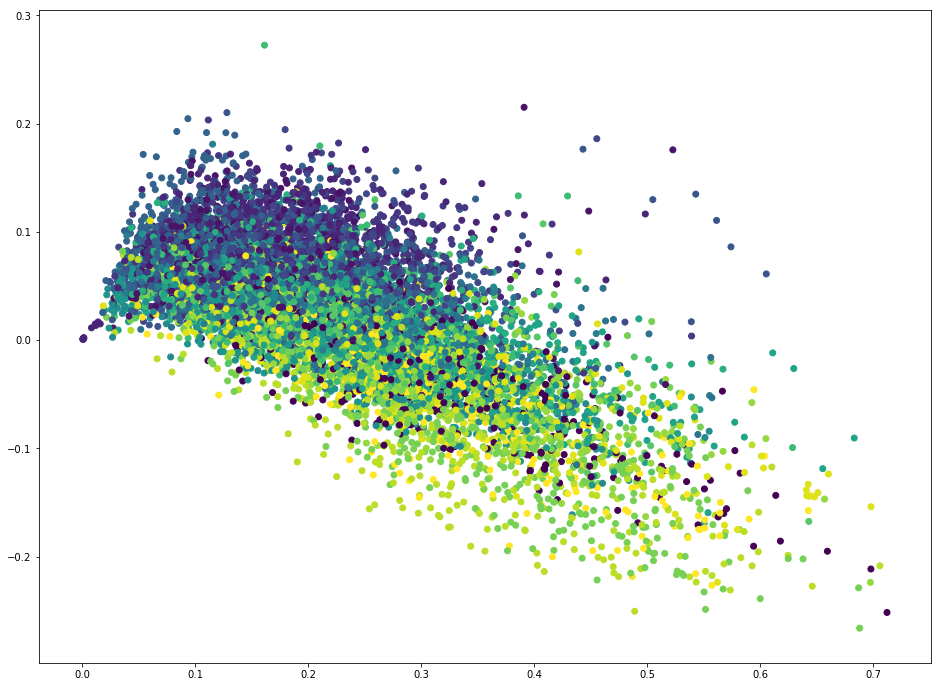

In [7]:
plt.figure(figsize=(16, 12))

plt.scatter(*X_reduced.T, c=y_train)
plt.show()

## Aggregating word embeddings

In [14]:
def encode_sentence(w2v_model, sent):
  word_vectors = (w2v_model[w] for w in sent if w2v_model.vocab.get(w))
  return sum(word_vectors) / len(sent)

In [15]:
encode_sentence(model, X_train_text[0])

array([-0.29583022,  0.26950806,  0.1179482 , -0.14464296, -0.23090576,
        0.09596244,  0.19718046,  0.1407562 , -0.28485608,  0.14818151,
        0.48238119, -0.38826627, -0.3315523 ,  0.31176022,  0.0084789 ,
       -0.15746677, -0.02897535, -0.01371089, -0.04060855,  0.13748363,
        0.47764984,  0.07012022,  0.05093929,  0.3552359 ,  0.12394148,
        0.42858526,  0.14709666,  0.00193489,  0.13434884, -0.19769122,
        0.26994175,  0.54793817,  0.04704136,  0.1941504 ,  0.2694886 ,
        0.11962148,  0.35353374,  0.20002168,  0.15998685,  0.22947702,
        0.21085867, -0.41103643, -0.04765938, -0.42549524, -0.08624344,
        0.1152095 , -0.44972023, -0.02394271,  0.06661139, -0.23504801,
       -0.03130769,  0.09005468,  0.3059752 ,  0.06309874, -0.41385868,
       -1.46201038, -0.07565993,  0.21931101,  0.99777871,  0.26424313,
       -0.31867787, -0.0645573 , -0.43449759, -0.30162632,  0.60401446,
        0.3515099 ,  0.48294178,  0.42533517,  0.29183665,  0.22

In [21]:
%time X_w2v_train = np.array([encode_sentence(model, s) for s in X_train_text])

CPU times: user 42.8 s, sys: 0 ns, total: 42.8 s
Wall time: 42.8 s


11314